In [1]:
import pandas as pd
import geopandas as gpd
from pathlib import Path

current_path = Path.cwd()
data_path = current_path / "data"

In [2]:
data_path

WindowsPath('C:/Users/cenv1007/data')

In [17]:
from shapely import Point, LineString, Polygon

In [ ]:
# spatial relationship

In [26]:
from shapely.geometry import Polygon

# Define the coordinates for the first polygon
polygon_coords1 = [(0, 0), (0, 2), (2, 2), (2, 0)]

# Define the coordinates for the second polygon
polygon_coords2 = [(1, 1), (1, 3), (3, 3), (3, 1)]

# Create Polygon objects from the coordinates
polygon1 = Polygon(polygon_coords1)
polygon2 = Polygon(polygon_coords2)

# Check if the polygons intersect
if polygon1.intersects(polygon2):
    print("The polygons intersect.")
else:
    print("The polygons do not intersect.")


The polygons intersect.


In [ ]:
# spatial operation

<Axes: >

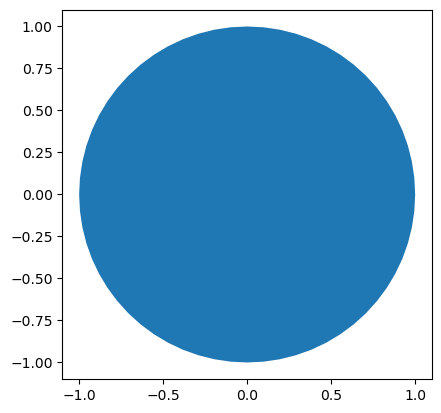

In [18]:
# create two points
P1 = Point(0,0)
P2 = Point(1,1)
# create a 1 meter buffer around Point1
gdf_p1 = gpd.GeoDataFrame(geometry=[P1])
buffered_p1 = gdf_p1.buffer(1)
#buffered_p1.plot()
gdf_p2 = gpd.GeoDataFrame(geometry=[P2])
buffered_p2 = gdf_p2.buffer(5)
#buffered_p2.plot()

<Axes: >

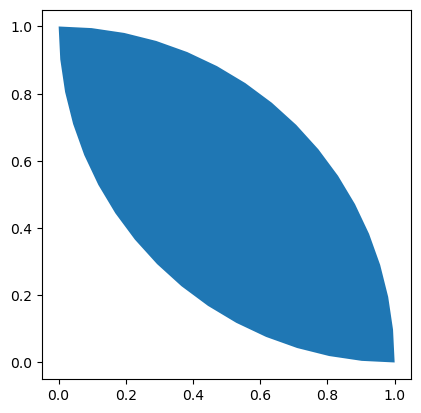

In [23]:
# intersect buffered P1 with buffered P2
intersection = buffered_p1.intersection(buffered_p2)
intersection.plot()

<Axes: >

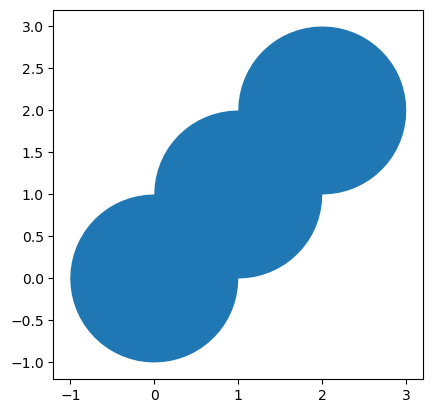

In [25]:
# Union of two buffered polygons 
union = buffered_p1.union(buffered_p2)
union.plot()

In [5]:
# (Optional) Find nearest cafes of each cycle hire shop (CRS)
from pathlib import Path

current_path = Path.cwd()
data_path = current_path / "data"

In [7]:
cafes = gpd.read_file(data_path / "cafes.gkpg")
cycle_hires = gpd.read_file(data_path / "cycle_hire.gpkg")

In [8]:
cafes.head(10)

,osm_id,name,geometry
0,node/25475389,Woburn Cafe,POINT (-0.12925 51.52658)
1,node/25497832,Cafe Angel,POINT (-0.11611 51.52476)
2,node/25991205,Jack's Cafe,POINT (-0.07248 51.55090)
3,node/26269218,Springfield Park Cafe,POINT (-0.05709 51.56865)
4,node/30062730,Perks and White,POINT (-0.10519 51.44000)
5,node/130210673,The Serpentine Lido Cafe,POINT (-0.16966 51.50467)
6,node/140681851,Starbucks,POINT (-0.13550 51.49899)
7,node/169436940,Buckingham Coffee Lounge,POINT (-0.14123 51.49878)
8,node/245780209,Beast of Brixton,POINT (-0.12472 51.45945)
9,node/248231088,Kalendar,POINT (-0.14968 51.56204)


In [62]:
cycle_hires.head(2)

,id,name,area,nbikes,nempty,geometry
0,1,River Street,Clerkenwell,4,14,POINT (-0.10997 51.52916)
1,2,Phillimore Gardens,Kensington,2,34,POINT (-0.19757 51.49961)


In [68]:
cafes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [64]:
cycle_hires.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

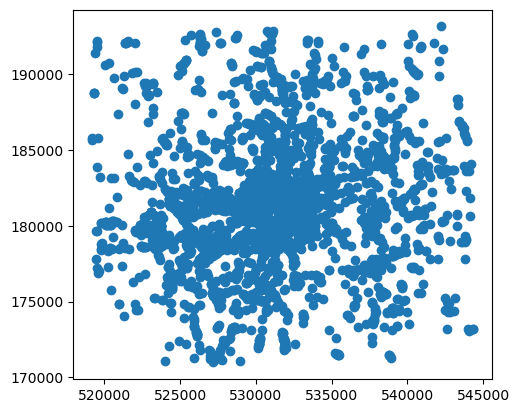

In [76]:
cafes.to_crs(27700).plot()

<Axes: >

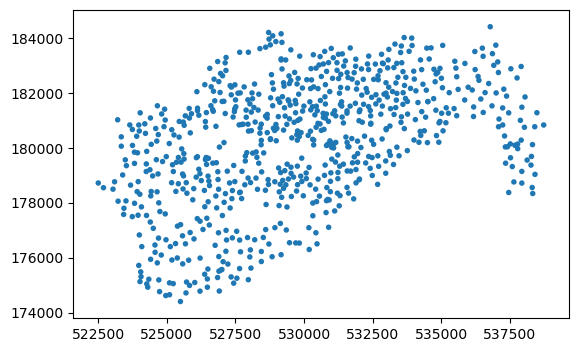

In [69]:
cycle_hires_100m = cycle_hires.to_crs(27700).copy()
cycle_hires_100m.geometry = cycle_hires_100m.buffer(100)
cycle_hires_100m.plot()

In [71]:
# the number of cafes within 100 meter of each cycle hire spot
cafes_within_100m = gpd.sjoin(cycle_hires_100m, cafes.to_crs(27700), how="left", predicate="intersects").groupby("id").agg({
    "index_right": "count",
}).rename(columns={"index_right": "cafes_within_100m"})

<Axes: >

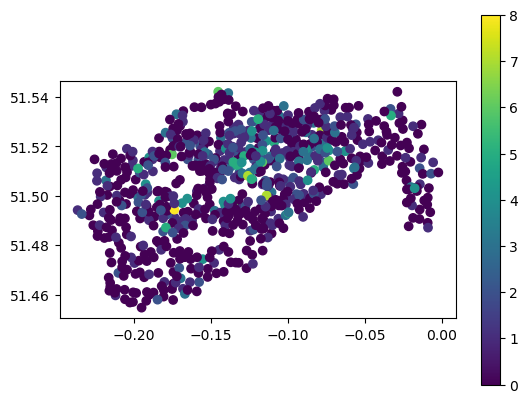

In [77]:
cycle_hires_near_cafes = cycle_hires.set_index("id").join(cafes_within_100m)
cycle_hires_near_cafes.plot(column="cafes_within_100m", legend=True)